In [1]:
import yfinance as yf
import pandas as pd
import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt
import pyfolio as pf

/opt/anaconda3/envs/skydog/lib/python3.9/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


# 个股研究

本笔记分析个股的重要数据。

In [2]:
ticker='FB'

In [9]:
#get data from yahoo finance
yfticker=yf.Ticker(ticker)
stock_info=yfticker.info
stcok_price=yfticker.history(start=dt.date(2010,5,6),auto_adjust=True)
benchmark_price=yf.Ticker('SPY').history(start=min(stcok_price.index),auto_adjust=True)

In [10]:
stock_info

{'zip': '94025',
 'sector': 'Communication Services',
 'fullTimeEmployees': 71970,
 'longBusinessSummary': "Meta Platforms, Inc. develops products that enable people to connect and share with friends and family through mobile devices, personal computers, virtual reality headsets, wearables, and in-home devices worldwide. It operates in two segments, Family of Apps and Reality Labs. The Family of Apps segment's products include Facebook, which enables people to share, discover, and connect with interests; Instagram, a community for sharing photos, videos, and private messages, as well as feed, stories, reels, video, live, and shops; Messenger, a messaging application for people to connect with friends, family, groups, and businesses across platforms and devices through chat, audio and video calls, and rooms; and WhatsApp, a messaging application that is used by people and businesses to communicate and transact privately. The Reality Labs segment provides augmented and virtual reality re

In [4]:
stock_info
if stock_info['currency']=='USD':
    stock_info['ticker_rate']=1
else:
    stock_info['ticker_rate']=yf.Ticker('%sUSD=X'%(stock_info['currency'])).history().Close[-1]

if stock_info['financialCurrency']=='USD':
    stock_info['financial_rate']=1
else:
    stock_info['financial_rate']=yf.Ticker('%sUSD=X'%(stock_info['financialCurrency'])).history().Close[-1]


## 基本面数据

In [8]:

print('盈利能力指标')
print('Gross Margin: %.2f%%'%(100*stock_info['grossMargins']))
print('Operating Cashflow Margin: %.2f%%'%(100*stock_info['operatingCashflow']/stock_info['totalRevenue']))
print('Net Profit Margin: %.2f%%'%(100*stock_info['profitMargins']))
print('ROE: %.2f%%'%(100*stock_info['returnOnEquity']))
print('估值指标')
print('PCF: %.1f'%((stock_info['marketCap']*stock_info['ticker_rate'])/(stock_info['operatingCashflow']*stock_info['financial_rate'])))
print('PE_TTM: %.1f'%(stock_info['trailingPE']))
print('PE_FWD: %.1f'%(stock_info['forwardPE']))
print('Revenue Growth: %.2f%%'%(100*stock_info['revenueGrowth']))
print('Eps Growth: %.2f%%'%(100*stock_info['earningsGrowth']))
print('PEG: %.2f'%(stock_info['pegRatio']))
print('Target Price Mean: %.2f, %.2f%%'%(stock_info['targetMeanPrice'],100*(stock_info['targetMeanPrice']/stock_info['currentPrice']-1)))
print('Target Price Low: %.2f, %.2f%%'%(stock_info['targetLowPrice'],100*(stock_info['targetLowPrice']/stock_info['currentPrice']-1)))
print('Target Price High: %.2f, %.2f%%'%(stock_info['targetHighPrice'],100*(stock_info['targetHighPrice']/stock_info['currentPrice']-1)))

盈利能力指标
Gross Margin: 80.79%
Operating Cashflow Margin: 48.91%
Net Profit Margin: 33.38%
ROE: 31.10%
估值指标
PCF: 9.4
PE_TTM: 14.6
PE_FWD: 13.7
Revenue Growth: 19.90%
Eps Growth: -5.20%
PEG: 4.30
Target Price Mean: 304.14, 51.71%
Target Price Low: 195.00, -2.73%
Target Price High: 553.00, 175.85%


# 股价与收益率分析

In [6]:
# sns.set()
# sns.histplot(data=stcok_price['Close'].pct_change())
# plt.title('Daily Return Histgram: %i days'%(stcok_price['Close'].count()))

Start date,2012-05-21
End date,2022-04-29
Total months,119
,Backtest
Annual return,18.155%
Cumulative returns,424.379%
Annual volatility,38.314%
Sharpe ratio,0.63
Calmar ratio,0.33
Stability,0.89
Max drawdown,-54.223%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,54.22,2021-09-07,2022-04-27,NaT,NaN
1,47.90,2012-05-21,2012-09-04,2013-07-25,309
2,42.96,2018-07-25,2018-12-24,2020-01-09,382
3,34.59,2020-01-29,2020-03-16,2020-05-20,81
4,22.06,2014-03-10,2014-04-28,2014-07-24,99


Stress Events,mean,min,max
EZB IR Event,0.23%,-9.06%,7.72%
Apr14,0.12%,-5.21%,7.25%
Oct14,-0.20%,-6.08%,4.57%
Fall2015,-0.12%,-4.98%,5.05%
Recovery,-0.15%,-11.69%,19.13%
New Normal,0.11%,-26.39%,29.61%


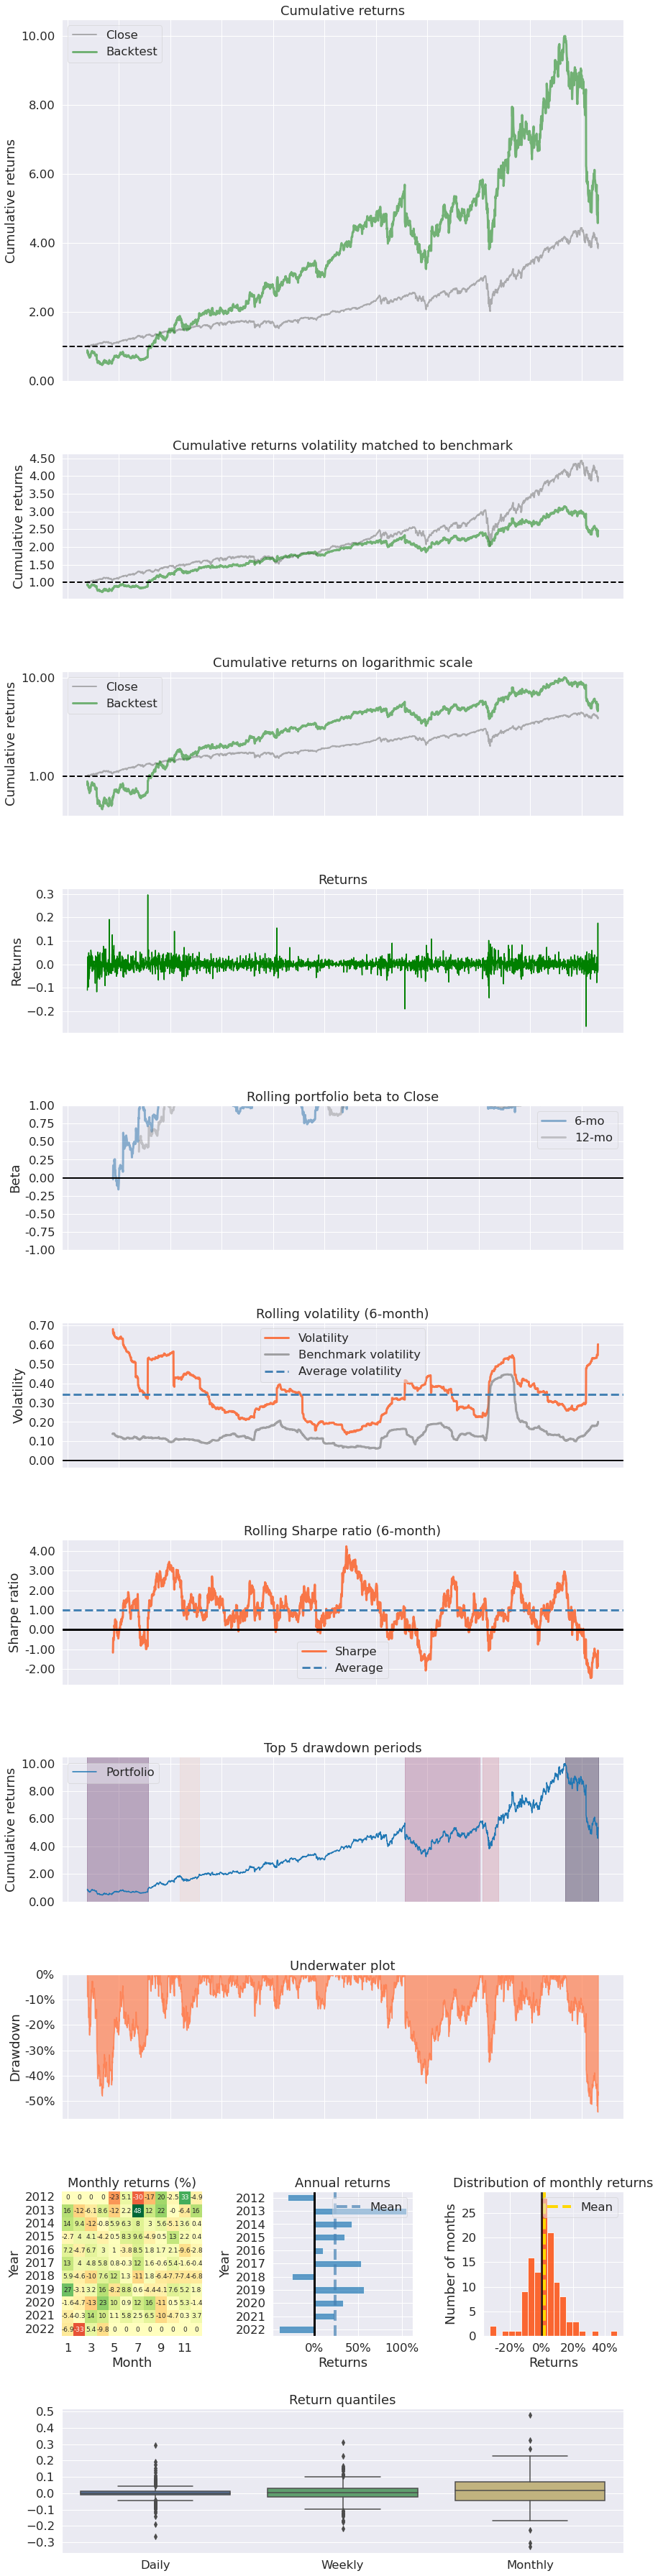

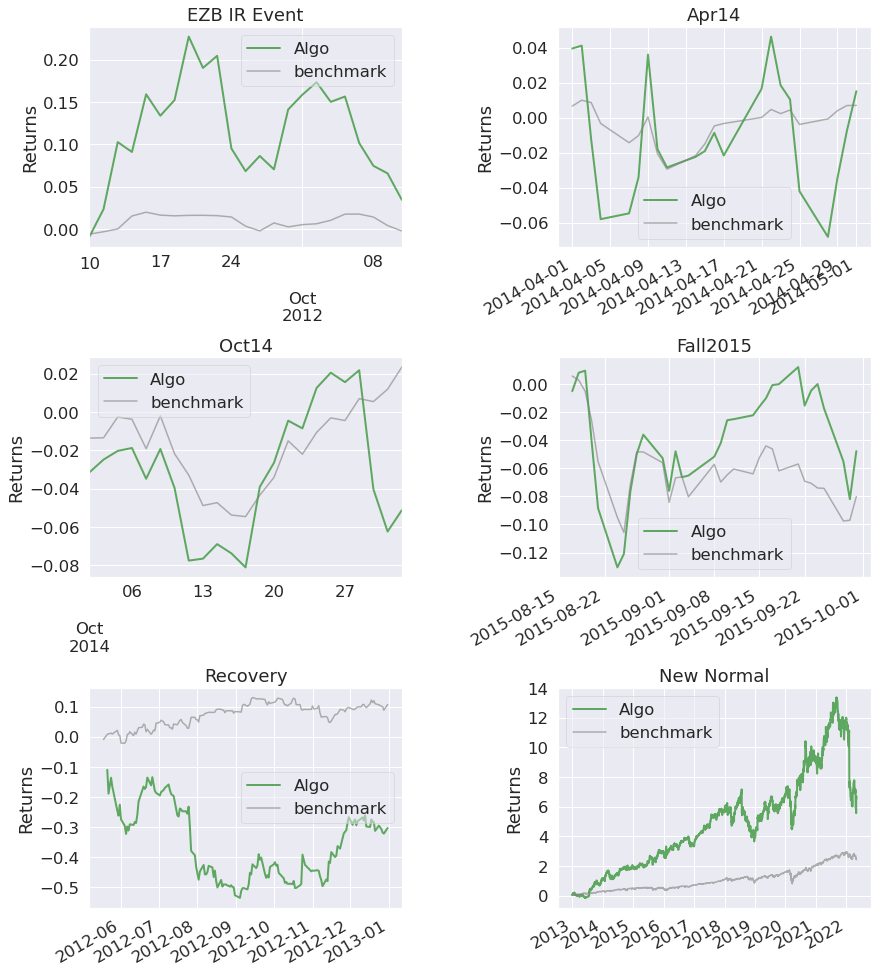

In [7]:
pf.create_full_tear_sheet(stcok_price['Close'].pct_change().dropna(),
                            benchmark_rets=benchmark_price['Close'].pct_change().dropna())